In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("zomato-data.csv")
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [124]:
df.dtypes


name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [125]:
def transform_rate(v):
    v=str(v).split('/')
    v=v[0]
    return float(v)

df['rate']=df['rate'].apply(transform_rate)
# plt.savefig('')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [126]:
df.info()
plt.savefig('info_table')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<Figure size 640x480 with 0 Axes>

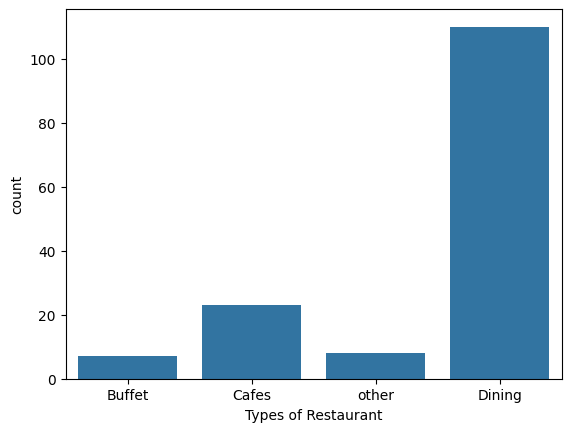

In [127]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Restaurant")
plt.savefig("hologram_Restaurant_graph")
plt.show()

In [136]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum() 
grouped_data
result=pd.DataFrame({'votes':grouped_data})
result


,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


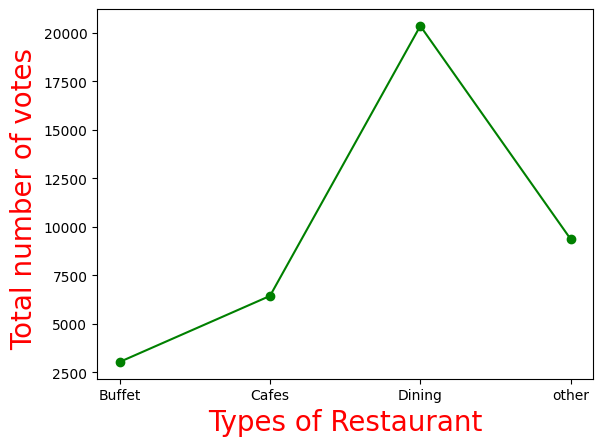

In [137]:
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of Restaurant',c='red',size=20)
plt.ylabel('Total number of votes ',c='red',size=20)
# plt.title('Line Plot for Total number of votes per category',size =20, pad =30)
plt.savefig('Types_of_Restaurant')
plt.show()

In [138]:
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']
restaurant_with_max_votes


38    Empire Restaurant
Name: name, dtype: object

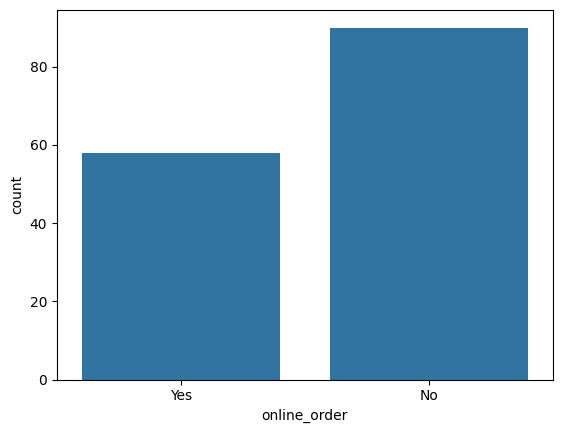

In [139]:
sns.countplot(x=df['online_order'])
plt.savefig('Online_orders')

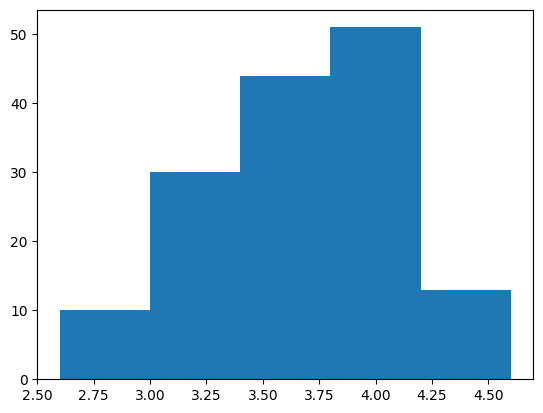

In [140]:
plt.hist(df['rate'], bins=5)
plt.title ='Rating_Distribution'
plt.savefig('Rating-Distribution')
plt.show()

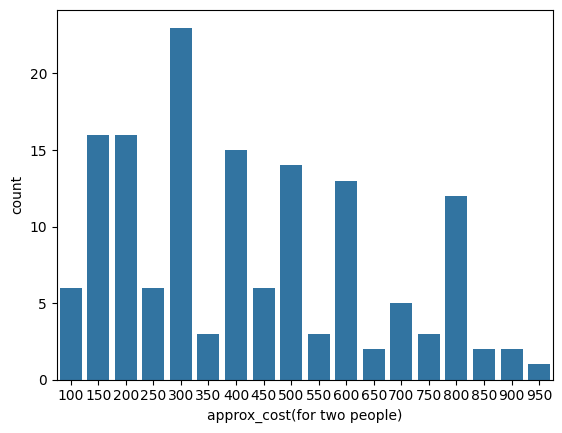

In [141]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.savefig('approx_cost')

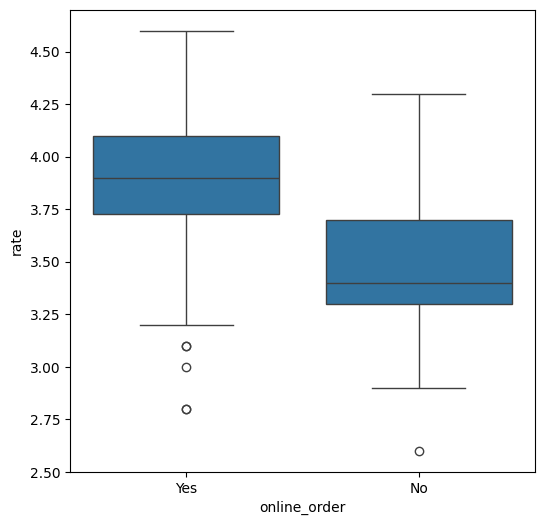

In [142]:
plt.figure (figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data =df)
plt.savefig('whisker_plot')

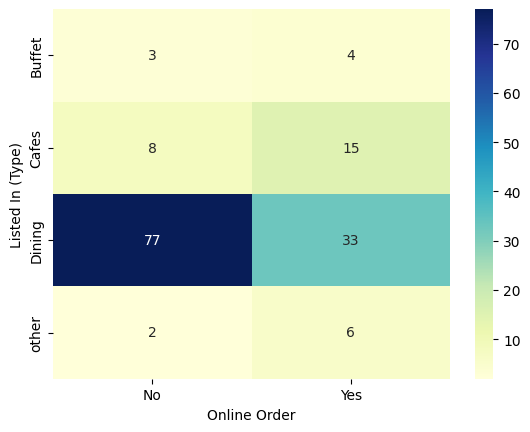

In [143]:
pivot_table =df.pivot_table(
index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.savefig('restaurant_heatmap')
plt.show()